<a href="https://colab.research.google.com/github/mehtaj10/Machine_Learning_Assignments/blob/main/Ridge_Classifier_Breast_Cancer_Cell_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Directories



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier


# **Extracting Data from Kaggle**



In [2]:
! pip install kaggle

In [3]:
import os
from google.colab import files

if not os.path.exists("/root/.kaggle/kaggle.json"):
    print("Please upload your kaggle.json file (from your Kaggle account).")
    files.upload()  # user uploads kaggle.json
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json

Please upload your kaggle.json file (from your Kaggle account).


Saving kaggle.json to kaggle.json


In [4]:
! kaggle datasets download uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 156MB/s]


In [5]:
! unzip -o breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


Here, I have implemented a Kaggle JSON upload option to uplad the database for smooth reproducability and sharing.

The **Winconsin Breast Cancer Dataset** is downloaded to the environment

# Data Description


In [6]:
df = pd.read_csv('/content/data.csv')

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The **Wisconsin Breast Cancer (Diagnostic) Data Set** has **10 real-valued features** of medical examinations of breasts along with an outcome of Malignant or Benign, referring to presence or absence of cancel cells respectively.

The **mean**, **standard error** and **"worst" or largest** (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.

# Data Cleaning

**Steps Taken:**

1.   Checked for duplicate rows of data; *found none.*
2.   Dropped 'id' and 'diagnosis from the dependent variables. 'id' was irrelevant as an input variable and 'diagnosis' was the **target variable**.
3. Performed Binary label encoding of categorical target values. 'Malignant' was encoded as 1, "Benign' as 0.



In [8]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [9]:
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0})

# Ridge Classifer

**Ridge Classifier:** a linear classification model that applies Ridge Regression (with L2 regularization) to a classification problem.

A Ridge Regression minimizes:

**Loss=∣∣y−Xw∣∣^2+α∣∣w∣∣^2**

Where,

𝑋: input features

𝑦: target values (here, class labels converted to +1 and -1)

𝑤: model weights

α: regularization strength (controls how much penalty is added to large weights)


# Judging Suitability of the Data for Ridge Classification

**Ridge classifier** is a great match for dataset with high collinearity. Ridge's L2 regularization penalty shrinks large coefficients toward zero without setting them exactly to zero.

Ultimately, the weights of the correlated factors are distributed more evenly in the model.

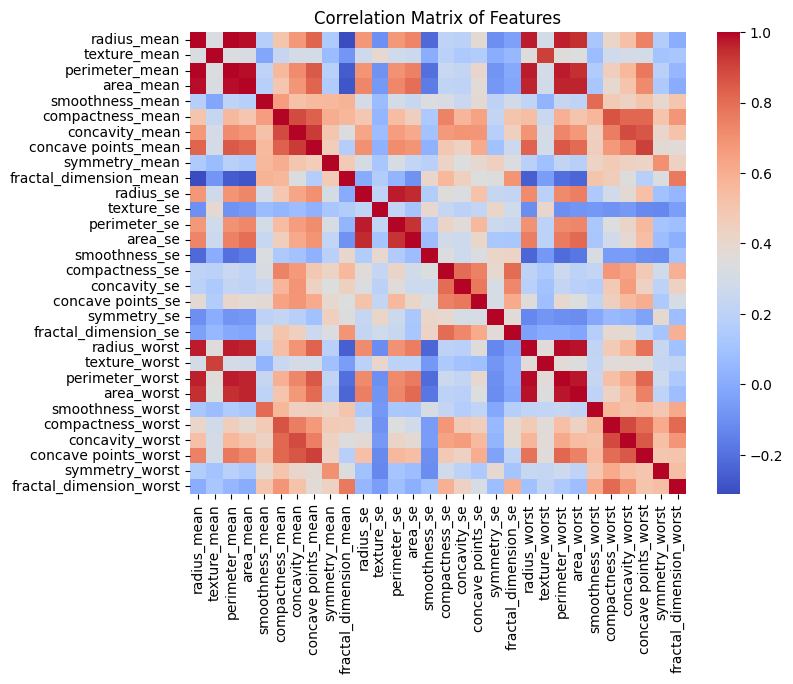

In [10]:
#Creating a Correlation Matrix
correlation_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

**Observation: Possible High Collinearity in the data**



**Calculating Variance Inflation Factor (VIF)**

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Adding a constant to the dataframe to calculate VIF for the intercept
X_with_constant = X.copy()
X_with_constant['intercept'] = 1

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i)
                   for i in range(X_with_constant.shape[1])]

# Displaying the VIF data
print("Top 5 features with highest VIF:")
display(vif_data.sort_values(by="VIF", ascending=False).head(5))

Top 5 features with highest VIF:


,feature,VIF
0,radius_mean,3806.115296
2,perimeter_mean,3786.400419
30,intercept,1868.188844
20,radius_worst,799.105946
22,perimeter_worst,405.023336


**A feature is determined as having collinearity when the VIF is higher than 5.Having so many features with extremely high VIF confirms high collinearity in the data**

**Final Verdict:**

Numerical Features with high collinearity. Hence, **Ridge Classifier is ideal** as it minimizes overfitting the data by ensuring the model doesn't give imbalanced significance to any specific feature.


# Data Splitting & Scaling

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Split:** I am doing a standard 80-20 split for training and testing.

**Scaler:** I am using StandardScaler to ensure that the difference in magnitude among the different factors does not skew the model.

# Model Training

In [13]:
# Training the Model
model = RidgeClassifier(class_weight='balanced', alpha = 10)
model.fit(X_train_scaled, y_train)

RidgeClassifier(alpha=10, class_weight='balanced')

**Class_weight ='balanced' :** The number of Benign cases is higher than Malignant ones in the data. A balanced claas_weight ensures equitable treatment of all data instances by putting a commensurately higher penalty on errors on the minority class. This leads to higher F1-scores for the model by optimizing Precision and Recall.

# Accuracy

In [14]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9736842105263158


This means that **out of 100 predictions made, over 97 are correct.**

However, we must dig deeper with Precision, Recall and F-1 score to ensure that we can correctly predict both Benign and Malignant cases.

# Overall Report

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Precision:** Fraction of predicted positives that are actually positive.

**Recall:** Fraction of actual positives correctly predicted

**F1-Score:** Balanced mean of precision and recall (useful for imbalance).

**Support:** Number of test samples per class (71 benign/0, 43 malignant/1; total 114).

**A high score on both Precision and Recall** shows that the model is great at predicting both Positive and Negative cases, and doesn't blindly ascribe a single outcome to all.

For medical cases, **Recall** is considered the most important as the a false negative can lead to dire curcumstances.

**Confusion Matrix**

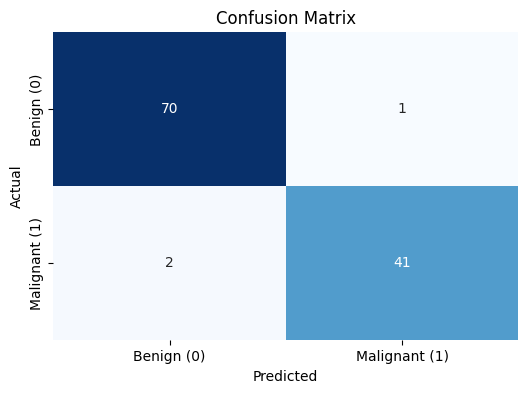

In [16]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Shows that out of 72 predictions of benign, 70 were accurate. And out of 42 predictions of Malignant, 41 were accurate.

# Calculating and Visualizing AUC

<Figure size 800x600 with 0 Axes>

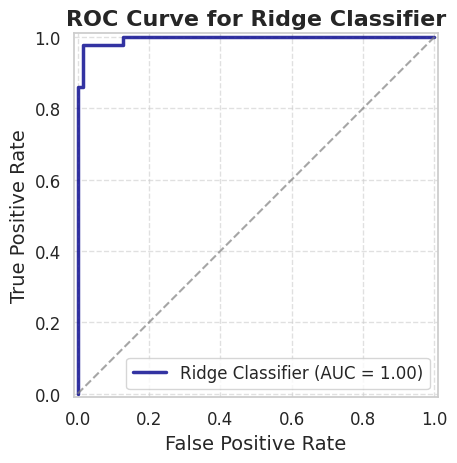

AUC: 0.9954143465443825


In [25]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


# Setting Seaborn Style
sns.set(style="whitegrid", palette="deep")


y_score = model.decision_function(X_test_scaled)

# Calculating the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Creating the figure
plt.figure(figsize=(8, 6))

# Plotting the ROC Curve
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Ridge Classifier')
display.plot(linewidth=2.5, color='darkblue', alpha=0.8)

# Adding a diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5, alpha=0.7)

# Title font
plt.title('ROC Curve for Ridge Classifier', fontsize=16, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)

# Tick Label
plt.tick_params(axis='both', labelsize=12)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Adding legend with AUC
plt.legend([f'Ridge Classifier (AUC = {roc_auc:.2f})'], loc='lower right', fontsize=12)

# Tight layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

print(f"AUC: {roc_auc}")

An AUC of 0.995 on the test data indicates a near-perfect seperation between benign and malignant cases.

**Cross-Validation with AUC on the training data:**

In [26]:
from sklearn.metrics import roc_curve, auc

# Predicting probabilities on the training data
y_train_score = model.decision_function(X_train_scaled)

# Calculating the ROC curve for the training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_score)
roc_auc_train = auc(fpr_train, tpr_train)

print(f"AUC on the training data: {roc_auc_train}")

AUC on the training data: 0.9961931559564695


Almost similar score on training and test data indicates the model has recognized the patterns in the training dataset and is applying them to correctly seperate malignant cases from benign ones.

The regularization in Ridge helps here by shrinking coefficients to prevent over-reliance on any single feature.

# Most Important Factors - Permutation Importance

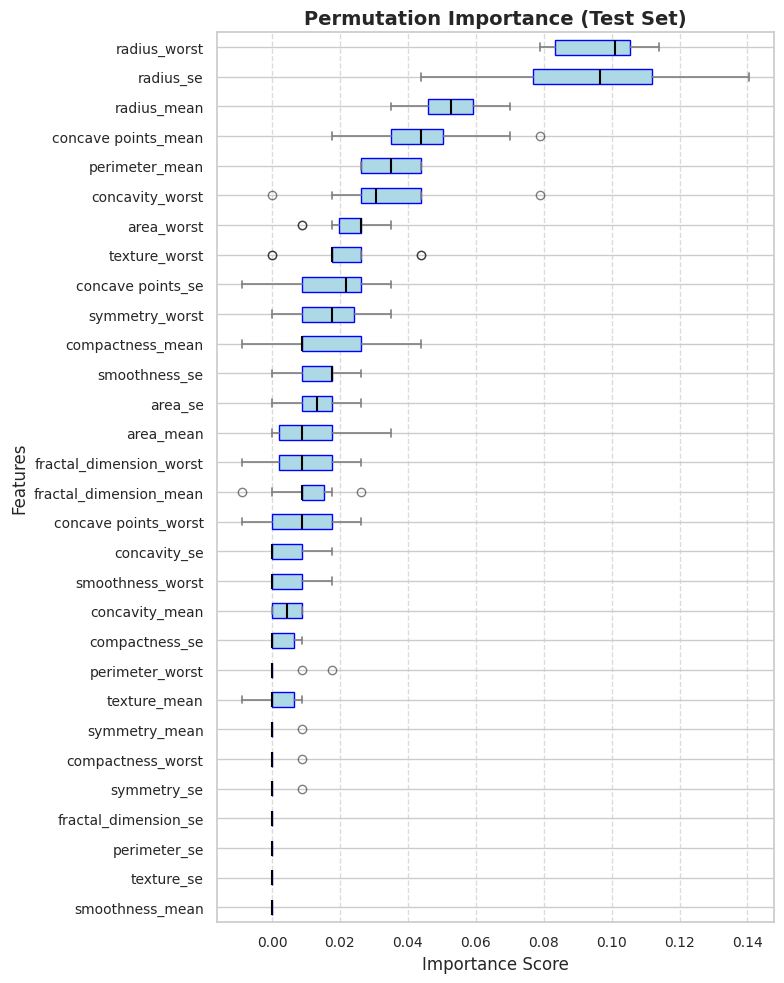

In [24]:
from sklearn.inspection import permutation_importance

# Seaborn Style
sns.set(style="whitegrid", palette="pastel")

# Computing permutation importance
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Sorting indices in ascending order
sorted_idx = result.importances_mean.argsort()

# Plot figure
plt.figure(figsize=(8, 10))

# Box specifications
box = plt.boxplot(result.importances[sorted_idx].T, vert=False, patch_artist=True,
                  tick_labels=X.columns[sorted_idx],
                  medianprops=dict(color="black", linewidth=1.5),
                  whiskerprops=dict(color="gray", linewidth=1.2),
                  boxprops=dict(facecolor="lightblue", color="blue"),
                  capprops=dict(color="gray", linewidth=1.2),
                  flierprops=dict(marker="o", color="red", alpha=0.5))

# Title
plt.title("Permutation Importance (Test Set)", fontsize=14, fontweight='bold')

# Labels
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tick_params(axis='both', labelsize=10)

# Gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()

# Showing the plot
plt.show()

The permutation_importance function helps us to determine the most important factors. For each feature, it shuffles its values in X_test_scaled (while keeping others fixed), predicts with the model, and computes the drop in score (default: accuracy for classifiers) compared to the baseline.

The graph shows us that the top contributing features are related to the radius.

# Tinkering the Alpha

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(RidgeClassifier(class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'alpha': 10.0}
Best cross-validation score: 0.9714285714285713


**GridSearchCV** optimizes the regularization strength (alpha) for the Ridge Classifier. I speficied a list of aplha values to try out and then fit the search on scaled trained data.

The process helps to balance bias and variance, improving model stability and generalization. This is especially necessary for datasets with high multicollinearity like this one.

The alpha of the model was changed from its initial value of 1.0 to 10.0 after optimization through GridSearchCV.